# Import Data and Libraries:

In [90]:
# Importing data manipulation libraries
import pandas as pd
import numpy as np

# Geocoding Data for longitude and latitude
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# Graphical libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Fltering warnings
import warnings
warnings.filterwarnings('ignore')

In [65]:
# Importing the data
staging_chicago_enriched = pd.read_csv('C:\\Users\\jrzem\\OneDrive\\Semester Classwork\\Graduate\\Fall 2025 CMU\\Data Focused Python\\HospiTrack\\Data and Cleaning\\Hospital Stats Data\\staging_chicago_enriched.csv')
staging_chicago = pd.read_csv('C:\\Users\\jrzem\\OneDrive\\Semester Classwork\\Graduate\\Fall 2025 CMU\\Data Focused Python\\HospiTrack\\Data and Cleaning\\Hospital Stats Data\\staging_chicago.csv')
wait_times = pd.read_csv('C:\\Users\\jrzem\\OneDrive\\Semester Classwork\\Graduate\\Fall 2025 CMU\\Data Focused Python\\HospiTrack\\Data and Cleaning\\Hospital Stats Data\\wait_times_timeseries.csv')

##### Explore data types:

In [66]:
print("Chicago Initial Data", staging_chicago.dtypes)
print("=============================================")
print("Chicago Enriched Data",staging_chicago_enriched.dtypes)
print("=============================================")
print("Chicago Wait Times Data",wait_times.dtypes)

Chicago Initial Data source            object
name              object
city              object
wait_minutes     float64
source_url        object
detail_url        object
raw_wait_text     object
scrape_ts         object
dtype: object
Chicago Enriched Data source                                     object
name                                       object
city                                       object
wait_minutes                              float64
source_url                                 object
detail_url                                 object
raw_wait_text                              object
scrape_ts                                  object
detail_name                                object
detail_address                             object
detail_city                                object
detail_state                               object
detail_zip                                  int64
detail_phone                               object
detail_hospital_type                       

The three datasets we have from the scraped source include:

1. Chicago Staged
   1. Name of hospital
   2. Name of city
   3. Averaged wait time in minutes
   4. urls for source and scraped time stamp
2. Chicago Enriched
   1. Includes name, city, wait in minutes, source urls, etc.
   2. state
   3. zip
   4. phone
   5. hospital_type
   6. mortality percentages per type
   7. time spent in emergency department
   8. patient ratings
3. Wait Times
   1. Simplified dataset including name, city, time stamp of collection, and wait minutes

#### Data overview:

In [67]:
staging_chicago.head()

,source,name,city,wait_minutes,source_url,detail_url,raw_wait_text,scrape_ts
0,hospitalstats,Presence Saint Joseph Hospital - Chicago,Chicago,147.0,https://www.hospitalstats.org/ER-Wait-Time/Chi...,https://www.hospitalstats.org/hospital-ratings...,2h 27m,2025-09-28T06:29:40.694043+00:00
1,hospitalstats,Loretto Hospital,Chicago,174.0,https://www.hospitalstats.org/ER-Wait-Time/Chi...,https://www.hospitalstats.org/hospital-ratings...,2h 54m,2025-09-28T06:29:40.694043+00:00
2,hospitalstats,Thorek Memorial Hospital,Chicago,174.0,https://www.hospitalstats.org/ER-Wait-Time/Chi...,https://www.hospitalstats.org/hospital-ratings...,2h 54m,2025-09-28T06:29:40.694043+00:00
3,hospitalstats,Insight Hospital And Medical Center Chicago,Chicago,182.0,https://www.hospitalstats.org/ER-Wait-Time/Chi...,https://www.hospitalstats.org/hospital-ratings...,3h 2m,2025-09-28T06:29:40.694043+00:00
4,hospitalstats,Holy Cross Hospital,Chicago,182.0,https://www.hospitalstats.org/ER-Wait-Time/Chi...,https://www.hospitalstats.org/hospital-ratings...,3h 2m,2025-09-28T06:29:40.694043+00:00


In [68]:
staging_chicago_enriched.head()

,source,name,city,wait_minutes,source_url,detail_url,raw_wait_text,scrape_ts,detail_name,detail_address,...,detail_mortality_heart_attack_percent,detail_mortality_stroke_percent,detail_mortality_heart_failure_percent,detail_mortality_pneumonia_percent,detail_c_diff_cases,detail_mrsa_cases,detail_avg_time_in_ed_minutes,detail_overall_patient_rating,detail_positive_patient_ratings,detail_negative_patient_ratings
0,hospitalstats,Presence Saint Joseph Hospital - Chicago,Chicago,147.0,https://www.hospitalstats.org/ER-Wait-Time/Chi...,https://www.hospitalstats.org/hospital-ratings...,2h 27m,2025-09-28T06:29:40.694043+00:00,Presence Saint Joseph Hospital - Chicago Ratings,2900 North Lake Shore Drive,...,11.9,13.1,9.9,17.2,5.0,1.0,147,AVERAGE,Doctors usually communicate well with patients,Staff doesn't respond quickly when patients ne...
1,hospitalstats,Loretto Hospital,Chicago,174.0,https://www.hospitalstats.org/ER-Wait-Time/Chi...,https://www.hospitalstats.org/hospital-ratings...,2h 54m,2025-09-28T06:29:40.694043+00:00,Loretto Hospital Ratings,645 South Central Ave,...,NaN,NaN,NaN,NaN,0.0,0.0,174,POOR,Rooms and facilities are usually clean,Staff doesn't respond quickly when patients ne...
2,hospitalstats,Thorek Memorial Hospital,Chicago,174.0,https://www.hospitalstats.org/ER-Wait-Time/Chi...,https://www.hospitalstats.org/hospital-ratings...,2h 54m,2025-09-28T06:29:40.694043+00:00,Thorek Memorial Hospital Ratings,850 W Irving Park Rd,...,NaN,NaN,NaN,15.4,2.0,0.0,174,AVERAGE,Nurses usually take time to communicate well; ...,Staff doesn't respond quickly when patients ne...
3,hospitalstats,Insight Hospital And Medical Center Chicago,Chicago,182.0,https://www.hospitalstats.org/ER-Wait-Time/Chi...,https://www.hospitalstats.org/hospital-ratings...,3h 2m,2025-09-28T06:29:40.694043+00:00,Insight Hospital And Medical Center Chicago Ra...,2525 S Michigan Ave,...,NaN,13.2,10.9,17.4,0.0,0.0,182,AVERAGE,Nurses usually take time to communicate well; ...,Staff doesn't respond quickly when patients ne...
4,hospitalstats,Holy Cross Hospital,Chicago,182.0,https://www.hospitalstats.org/ER-Wait-Time/Chi...,https://www.hospitalstats.org/hospital-ratings...,3h 2m,2025-09-28T06:29:40.694043+00:00,Holy Cross Hospital Ratings,2701 W 68th Street,...,NaN,13.9,9.8,18.5,6.0,1.0,182,BELOW AVERAGE,NaN,Staff doesn't respond quickly when patients ne...


In [69]:
wait_times.head()

,source,name,city,ts,wait_minutes,source_url
0,hospitalstats,Presence Saint Joseph Hospital - Chicago,Chicago,2025-09-28T06:29:40.694043+00:00,147.0,https://www.hospitalstats.org/ER-Wait-Time/Chi...
1,hospitalstats,Loretto Hospital,Chicago,2025-09-28T06:29:40.694043+00:00,174.0,https://www.hospitalstats.org/ER-Wait-Time/Chi...
2,hospitalstats,Thorek Memorial Hospital,Chicago,2025-09-28T06:29:40.694043+00:00,174.0,https://www.hospitalstats.org/ER-Wait-Time/Chi...
3,hospitalstats,Insight Hospital And Medical Center Chicago,Chicago,2025-09-28T06:29:40.694043+00:00,182.0,https://www.hospitalstats.org/ER-Wait-Time/Chi...
4,hospitalstats,Holy Cross Hospital,Chicago,2025-09-28T06:29:40.694043+00:00,182.0,https://www.hospitalstats.org/ER-Wait-Time/Chi...


#### Merging Data:

In [70]:
# Grabbing necessary columns for analysis
df = staging_chicago_enriched[[
    'name',
    'city',
    'detail_address',
    'detail_zip',
    'wait_minutes',
    'detail_hospital_type',
    'detail_emergency_services',
    'detail_mortality_overall_percent',
    'detail_mortality_overall_direction',
    'detail_mortality_heart_attack_percent',
    'detail_mortality_stroke_percent',
    'detail_mortality_heart_failure_percent',
    'detail_mortality_pneumonia_percent',
    'detail_c_diff_cases',
    'detail_mrsa_cases',
    'detail_overall_patient_rating'
]]

# Remove 'detail_' prefix from column names
df.columns = [col.replace('detail_', '') for col in df.columns]

# Create full address for further query in geospatial data
df['full_address'] = df['address'].str.replace(r'\b(Box|Suite)\s+\d+\b', '', regex=True).str.strip() + ', ' + df['city'] + ', IL, ' + df['zip'].astype(str)

# Output cleaned dataset for extrapolating
df.head()

,name,city,address,zip,wait_minutes,hospital_type,emergency_services,mortality_overall_percent,mortality_overall_direction,mortality_heart_attack_percent,mortality_stroke_percent,mortality_heart_failure_percent,mortality_pneumonia_percent,c_diff_cases,mrsa_cases,overall_patient_rating,full_address
0,Presence Saint Joseph Hospital - Chicago,Chicago,2900 North Lake Shore Drive,60657,147.0,Acute Care Hospitals,YES,8.0,better,11.9,13.1,9.9,17.2,5.0,1.0,AVERAGE,"2900 North Lake Shore Drive, Chicago, IL, 60657"
1,Loretto Hospital,Chicago,645 South Central Ave,60644,174.0,Acute Care Hospitals,YES,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,POOR,"645 South Central Ave, Chicago, IL, 60644"
2,Thorek Memorial Hospital,Chicago,850 W Irving Park Rd,60613,174.0,Acute Care Hospitals,YES,18.0,better,NaN,NaN,NaN,15.4,2.0,0.0,AVERAGE,"850 W Irving Park Rd, Chicago, IL, 60613"
3,Insight Hospital And Medical Center Chicago,Chicago,2525 S Michigan Ave,60616,182.0,Acute Care Hospitals,YES,6.0,better,NaN,13.2,10.9,17.4,0.0,0.0,AVERAGE,"2525 S Michigan Ave, Chicago, IL, 60616"
4,Holy Cross Hospital,Chicago,2701 W 68th Street,60629,182.0,Acute Care Hospitals,YES,4.0,better,NaN,13.9,9.8,18.5,6.0,1.0,BELOW AVERAGE,"2701 W 68th Street, Chicago, IL, 60629"


# Geospatial Data:

1. Begin to incorporate geospatial data by producing longitude and latitude values for the addresses.
2. Pull this source from Google Geocoding API.
3. Validate any coordinates and check for errors.

In [71]:
# Add geospatial (lat, lon) via geocoding
geolocator = Nominatim(user_agent="er_wait_times_project") 
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)  # Rate limit to 1/sec as per Nominatim policy

# Simple cache to avoid re-geocoding
geocode_cache = {}

def get_lat_lon(addr):
    if addr in geocode_cache:
        return geocode_cache[addr]
    try:
        location = geocode(addr)
        if location:
            geocode_cache[addr] = (location.latitude, location.longitude)
            return geocode_cache[addr]
    except Exception as e:
        print(f"Geocoding error for {addr}: {e}")
    return (None, None)

df[['lat', 'lon']] = df['full_address'].apply(lambda addr: pd.Series(get_lat_lon(addr)))

df[['name','full_address','lat','lon']]

,name,full_address,lat,lon
0,Presence Saint Joseph Hospital - Chicago,"2900 North Lake Shore Drive, Chicago, IL, 60657",41.933885,-87.637402
1,Loretto Hospital,"645 South Central Ave, Chicago, IL, 60644",41.872098,-87.763540
2,Thorek Memorial Hospital,"850 W Irving Park Rd, Chicago, IL, 60613",41.954991,-87.652393
3,Insight Hospital And Medical Center Chicago,"2525 S Michigan Ave, Chicago, IL, 60616",41.846816,-87.622517
4,Holy Cross Hospital,"2701 W 68th Street, Chicago, IL, 60629",41.769343,-87.692225
5,Jackson Park Hospital,"7531 S Stony Island Ave, Chicago, IL, 60649",41.757675,-87.585171
6,Humboldt Park Health,"1044 N Francisco Ave, Chicago, IL, 60622",41.900778,-87.699301
7,Provident Hospital Of Chicago,"500 E 51st St, Chicago, IL, 60615",41.803046,-87.613579
8,Saint Anthony Hospital,"2875 West 19th Street, Chicago, IL, 60623",41.855151,-87.697870
9,Methodist Hospital Of Chicago,"5025 N Paulina Street, Chicago, IL, 60640",41.973127,-87.671081


We need to check for any potential invalid or missing coordinates that may occur, and assess why to potentially fix it. The bounding box for Chicago was found online to gain a close approximation to the region of Chicago city in Illinois.

In [72]:
# Validate coords (e.g., Chicago bounding box: lat 41.64-42.02, lon -87.52--88.0)
df['valid_coords'] = df.apply(lambda row: 41.64 < row['lat'] < 42.02 and -88.0 < row['lon'] < -87.52 if pd.notna(row['lat']) else False, axis=1)
print(f"Invalid coords: {df[~df['valid_coords']].shape[0]}")  # Flag for manual review

# Print out rows with invalid coordinates
print(df[~df['valid_coords']][['name', 'full_address', 'lat', 'lon']])

Invalid coords: 0
Empty DataFrame
Columns: [name, full_address, lat, lon]
Index: []


The above geocoding using APIs gives us some general latitude and longitude regions for the data of hospitals. We also checked for potential invalid coordinates that may occur.

In [73]:
# Remove unnecessary column
df = df.drop(columns=['valid_coords'])

# Save the result
df.to_csv('C:\\Users\\jrzem\\OneDrive\\Semester Classwork\\Graduate\\Fall 2025 CMU\\Data Focused Python\\HospiTrack\\Data and Cleaning\\Hospital Stats Data\\hospital_stats_geocoded.csv', index=False)

# EDA

#### Assess Variables:

In [74]:
# Show columns with null values and their counts
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

wait_minutes                        4
mortality_overall_percent           6
mortality_overall_direction         6
mortality_heart_attack_percent     15
mortality_stroke_percent           15
mortality_heart_failure_percent     8
mortality_pneumonia_percent         8
c_diff_cases                        4
mrsa_cases                          4
dtype: int64


Above we see that there are a lot of hospitals with null values to remove or ignore for the wait time particularly in future analysis.

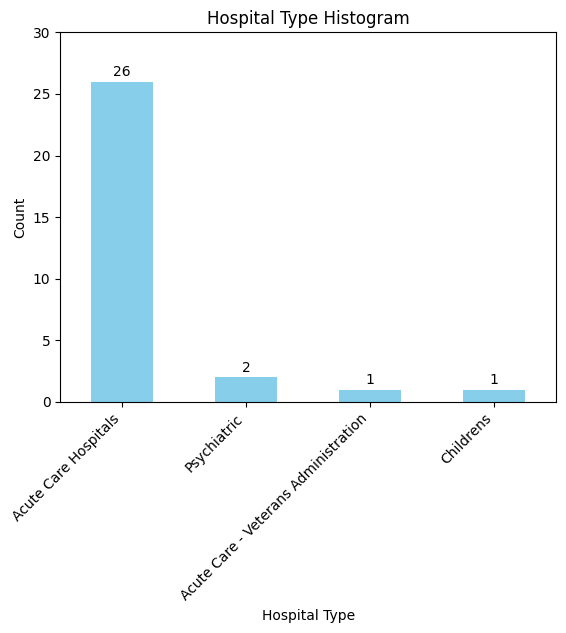

In [75]:
# Count the number of hospitals by type in df
hospital_type_counts = df['hospital_type'].value_counts()

# Plotting distribution
ax = hospital_type_counts.plot(kind='bar', color='skyblue')
ax.set_title('Hospital Type Histogram')
ax.set_xlabel('Hospital Type')
ax.set_ylabel('Count')
plt.ylim(0,30)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(hospital_type_counts):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom')
plt.show()

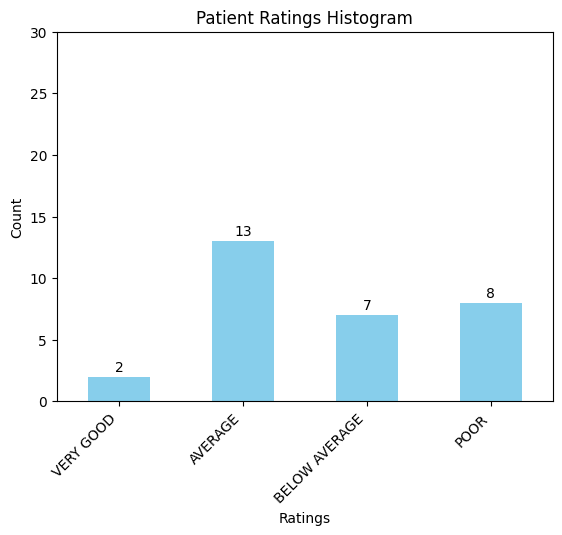

In [76]:
patient_rating_counts = df['overall_patient_rating'].value_counts()

# Redefine the rating order from left to right
rating_order = ['VERY GOOD', 'AVERAGE', 'BELOW AVERAGE', 'POOR']

# Reindex the counts to match the desired order (fill missing with 0)
ordered_counts = patient_rating_counts.reindex(rating_order, fill_value=0)

# Plotting distribution
ax = ordered_counts.plot(kind='bar', color='skyblue')
ax.set_title('Patient Ratings Histogram')
ax.set_xlabel('Ratings')
ax.set_ylabel('Count')
plt.ylim(0, 30)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(ordered_counts):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom')
plt.show()

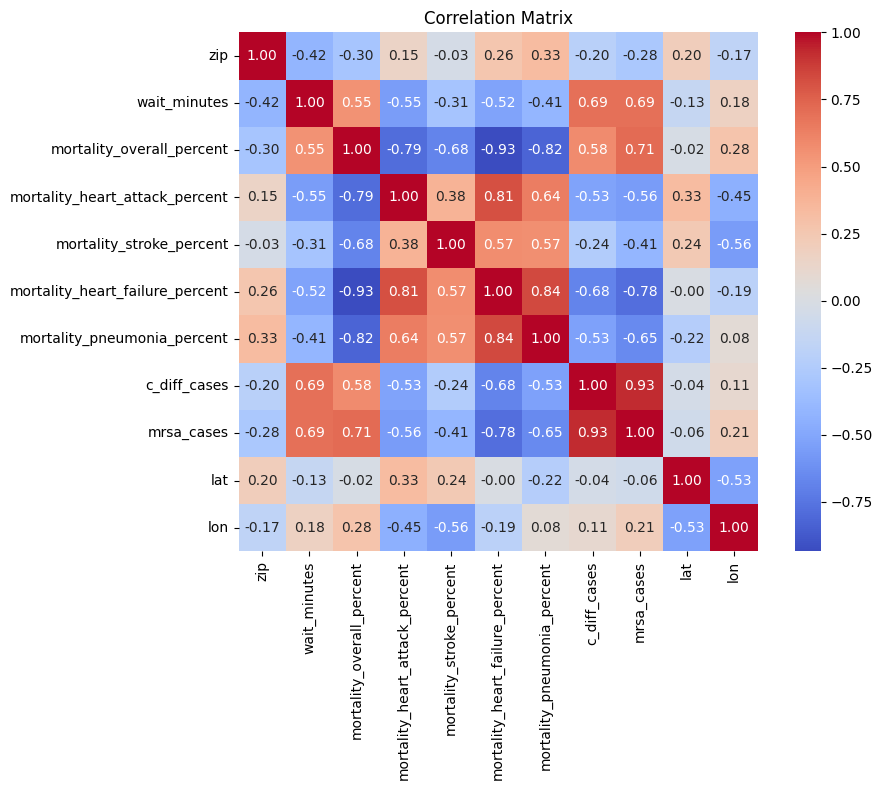

In [77]:
# Compute correlation matrix for numerical columns in df
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Plot the correlation matrix as a seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [78]:
# Find pairs with correlation > 0.8 (excluding self-correlation)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:
            high_corr_pairs.append((col1, col2, corr_value))

# Print the pairs
for col1, col2, corr_value in high_corr_pairs:
    print(f"{col1} <-> {col2}: {corr_value:.2f}")

mortality_overall_percent <-> mortality_heart_failure_percent: -0.93
mortality_overall_percent <-> mortality_pneumonia_percent: -0.82
mortality_heart_attack_percent <-> mortality_heart_failure_percent: 0.81
mortality_heart_failure_percent <-> mortality_pneumonia_percent: 0.84
c_diff_cases <-> mrsa_cases: 0.93


In [84]:
# Columns to check 
columns = ['wait_minutes', 'mortality_overall_percent','mortality_heart_attack_percent','mortality_stroke_percent',
           'mortality_heart_failure_percent','mortality_pneumonia_percent','c_diff_cases','mrsa_cases']

# 
outlier_summary = {}
for col in columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    outlier_summary[col] = {
        'num_outliers': outliers.count(),
        'outlier_indices': outliers.index.tolist(),
        'outlier_values': outliers.values
    }
    print(f"{col}: {outliers.count()} outliers")
    if outliers.count() > 0:
        print(f"  Indices: {outliers.index.tolist()}")
        print(f"  Values: {outliers.values}")

# Showcase outlier values and indices in dataset for columns that are checked
outlier_counts = {col: info['num_outliers'] for col, info in outlier_summary.items()}


wait_minutes: 0 outliers
mortality_overall_percent: 2 outliers
  Indices: [23, 25]
  Values: [44. 46.]
mortality_heart_attack_percent: 2 outliers
  Indices: [10, 25]
  Values: [13.9  9.7]
mortality_stroke_percent: 0 outliers
mortality_heart_failure_percent: 2 outliers
  Indices: [23, 25]
  Values: [5.5 5.5]
mortality_pneumonia_percent: 1 outliers
  Indices: [23]
  Values: [11.6]
c_diff_cases: 2 outliers
  Indices: [21, 25]
  Values: [106.  69.]
mrsa_cases: 4 outliers
  Indices: [21, 23, 24, 25]
  Values: [18. 14. 11. 15.]


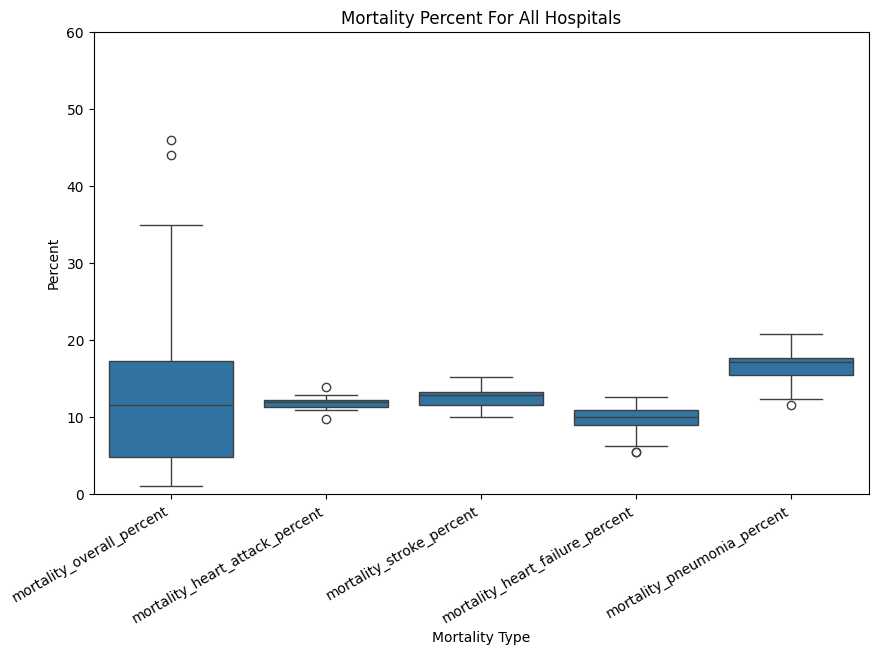

In [89]:
# Select mortality percent columns from df
mortality_cols = [
    'mortality_overall_percent',
    'mortality_heart_attack_percent',
    'mortality_stroke_percent',
    'mortality_heart_failure_percent',
    'mortality_pneumonia_percent'
]

# Prepare data for seaborn boxplot (melt to long format)
mortality_long = df.melt(
    value_vars=mortality_cols,
    var_name='Mortality Type',
    value_name='Percent'
)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Mortality Type', y='Percent', data=mortality_long)
plt.title('Mortality Percent For All Hospitals')
plt.xticks(rotation=30, ha='right')
plt.ylim(0,60)
plt.show()

#### Interactive Plot by Location:

In [98]:
# Drop rows with missing lat, lon, wait_minutes, or mortality_overall_percent for plotting
df_plot = df.dropna(subset=['lat', 'lon', 'wait_minutes', 'mortality_overall_percent'])

# Creating an interactive visualization
fig = px.scatter_mapbox(
    df_plot, lat='lat', lon='lon', 
    color='wait_minutes', size='mortality_overall_percent',
    hover_name='name', hover_data=['overall_patient_rating'],
    color_continuous_scale=px.colors.diverging.RdYlGn[::-1], 
    size_max=20, zoom=10, mapbox_style='open-street-map'
)
fig.update_layout(title='Chicago Hospitals: Wait Times & Factors')
fig.show()